In [1]:
import os.path
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from glob import glob

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from sklearn.preprocessing import LabelEncoder

In [2]:
print(os.getcwd()) 

C:\Users\hi\Desktop\DeepLearning


In [3]:
# 파일 경로 재설정
base_dir = os.chdir(os.getcwd() + "/data/chatbot_dataset/cloud_data/train/cloud_train")
print(os.getcwd())

C:\Users\hi\Desktop\DeepLearning\data\chatbot_dataset\cloud_data\train\cloud_train


In [4]:
data_list = glob('*.jpg')
print('파일 개수 >> ', len(data_list))
print('파일 목록 타입 >> ', type(data_list))

파일 개수 >>  2323
파일 목록 타입 >>  <class 'list'>


In [5]:
token = text_to_word_sequence(data_list[0])
print(token)

['ac', 'n001', 'jpg']


In [6]:
label = []
for x in data_list:
    token = text_to_word_sequence(x)
    label.append(token[0])
print(len(label))

2323


In [7]:
items = label
encoder = LabelEncoder()
label = encoder.fit_transform(items)
label

array([ 0,  0,  0, ..., 10, 10, 10], dtype=int64)

In [8]:
data_height = 64
data_width = 64
channel_n = 3

In [9]:
def make_file(dat_height, data_width, channel_n, data_list_len):
    label = []
    images = np.zeros((data_list_len, dat_height, data_width, channel_n))
    
    for i, image in enumerate(data_list):
        
        token = text_to_word_sequence(image)
        label.append(token[0])
        
        image = cv2.imread(image)
        image = cv2.resize(image, (dat_height, data_width)) / 255
        
        images[i, :, :, :] = image
    label = np.array(label)
    return (label, images) 

In [10]:
label, images = make_file(data_height, data_width, channel_n, len(data_list))

In [11]:
items = label
encoder = LabelEncoder()
label = encoder.fit_transform(items)
label, len(label) 

(array([ 0,  0,  0, ..., 10, 10, 10], dtype=int64), 2323)

In [12]:
x = images
y = label

X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size= 0.2,
                                                    random_state=55
                                                   )
print(X_train.shape, X_test.shape)

(1858, 64, 64, 3) (465, 64, 64, 3)


In [13]:
## 딥러닝 모델을 만들어보자.
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import datasets, layers, models

In [14]:
model = Sequential() # 모델 선언
  
model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu")) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) #과적합 방지 

model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#FC layer
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [15]:
# Compiling the CNN
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
es = EarlyStopping(monitor = 'val_loss', patience = 6, restore_best_weights=True)
cp = ModelCheckpoint('cloud_model.h5', monitor='val_loss', verbose = True)

In [17]:
cnn_history = model.fit( X_train, 
                       y_train,                
                       batch_size=50,
                       epochs=50,
                       validation_data = (X_test, y_test),
                       callbacks = cp,
                       verbose=2
                       )

Epoch 1/50

Epoch 1: saving model to cloud_model.h5
38/38 - 3s - loss: 2.5177 - accuracy: 0.1146 - val_loss: 2.3398 - val_accuracy: 0.2194 - 3s/epoch - 89ms/step
Epoch 2/50

Epoch 2: saving model to cloud_model.h5
38/38 - 3s - loss: 2.2683 - accuracy: 0.1884 - val_loss: 2.2145 - val_accuracy: 0.2237 - 3s/epoch - 77ms/step
Epoch 3/50

Epoch 3: saving model to cloud_model.h5
38/38 - 3s - loss: 2.2041 - accuracy: 0.2271 - val_loss: 2.1008 - val_accuracy: 0.2946 - 3s/epoch - 76ms/step
Epoch 4/50

Epoch 4: saving model to cloud_model.h5
38/38 - 3s - loss: 2.1310 - accuracy: 0.2395 - val_loss: 2.0802 - val_accuracy: 0.3484 - 3s/epoch - 76ms/step
Epoch 5/50

Epoch 5: saving model to cloud_model.h5
38/38 - 3s - loss: 2.0773 - accuracy: 0.2632 - val_loss: 2.0488 - val_accuracy: 0.3355 - 3s/epoch - 76ms/step
Epoch 6/50

Epoch 6: saving model to cloud_model.h5
38/38 - 3s - loss: 2.0531 - accuracy: 0.2686 - val_loss: 1.9768 - val_accuracy: 0.3398 - 3s/epoch - 76ms/step
Epoch 7/50

Epoch 7: saving 

In [18]:
test_result = model.evaluate(X_test, y_test)
test_result

15/15 [==============================] - 0s 9ms/step - loss: 3.1660 - accuracy: 0.3570


[3.1659557819366455, 0.3569892346858978]

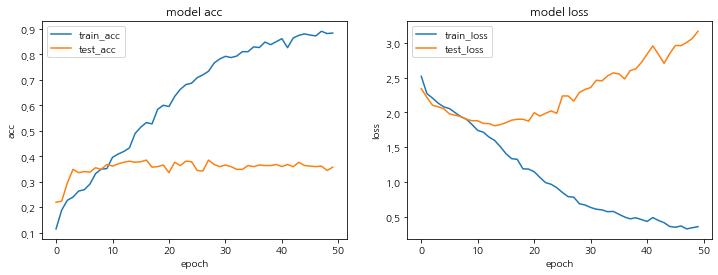

In [19]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1) ## 1행2열의 도표, 1열
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('model acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train_acc','test_acc'])

plt.subplot(1, 2, 2) ## 1행2열의 도표, 2열
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss','test_loss'])

In [20]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

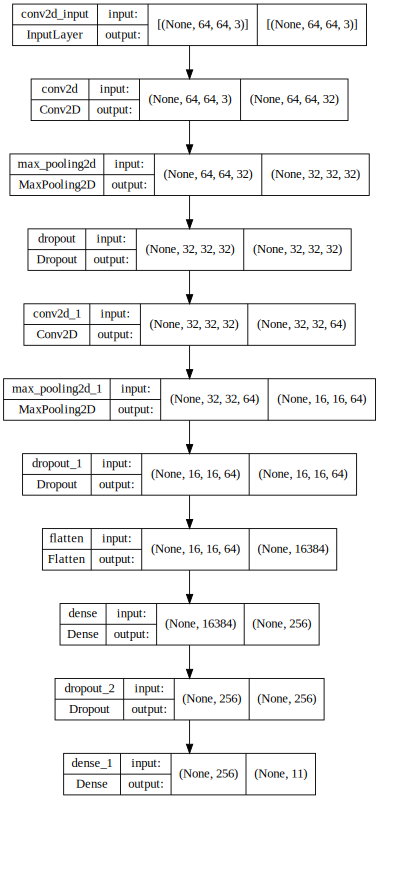

In [21]:
%matplotlib inline
SVG(model_to_dot(model, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

In [22]:
from keras.models import load_model
model.save('fashion_model.h5')

In [23]:
from keras.models import load_model
model = load_model('fashion_model.h5')

In [24]:
final_result = model.predict(X_test)
final_result[:11]

array([[6.47217035e-04, 2.04777371e-05, 3.51539456e-05, 7.32855960e-06,
        1.98754037e-06, 9.94370043e-01, 2.02920728e-06, 1.34274844e-04,
        1.25569606e-03, 7.69829727e-04, 2.75596068e-03],
       [1.06453598e-01, 2.36219838e-02, 1.75999103e-05, 3.17087979e-03,
        3.39088682e-03, 9.73248109e-02, 1.84392501e-02, 2.26410804e-03,
        3.48600582e-03, 7.39591062e-01, 2.23984406e-03],
       [1.00518838e-08, 7.31265670e-09, 1.14734334e-07, 9.32868170e-06,
        7.76881706e-08, 1.20551722e-05, 3.73715103e-08, 8.03335976e-09,
        9.96563733e-01, 3.00791697e-03, 4.06771695e-04],
       [9.12422431e-04, 4.58778208e-03, 8.01108312e-04, 8.34972322e-01,
        6.71731234e-02, 2.08268482e-02, 4.57579212e-04, 6.44255280e-02,
        9.83484555e-04, 1.75472116e-03, 3.10495030e-03],
       [5.38782310e-03, 9.87564623e-01, 8.62858069e-05, 8.46920520e-05,
        4.19386802e-03, 2.52652360e-04, 5.49526646e-07, 1.60355529e-09,
        9.54910138e-05, 1.37225070e-05, 2.32030102e-

In [25]:
y_list = y_test.tolist()

In [26]:
y_list_0 = y_list.count(0)
y_list_0

32

In [27]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [28]:
predictions = probability_model.predict(X_test)

In [29]:
np.argmax(predictions[0])

5

In [30]:
y_test[0]

9

In [31]:
class_names = ['권운(cirrus, Ci)', '권층운(cirrostratus, Cs)', '권적운(cirrocumulus, Cc)', 
               '고적운(altocumulus, Ac)', '고도층(altostratus, As)', '적운(cumulus, Cu)', 
               '적란운(cumulonimbus, Cb)', '후광층(nimbostratus, Ns)', '성층적운(stratocumulus, Sc)', 
               '충운(stratus, St)', '난기류(contrail, Ct)']

In [32]:
from tkinter import filedialog

In [33]:
# 이미지마다 크기가 다 다르다.-> 픽셀 사이즈 동일해게 해주어야 전처리가 가능하다.
data_height = 64
data_width = 64
channel_n = 3
images = np.zeros((1, data_height, data_width, channel_n))
## 이미지 읽고, 스케일링, 리사이징
path = filedialog.askopenfilename(filetypes=[('Image File','jpg'), ('Image File','jpg'), ('Image File','jpg')])
path=path.replace('\\','/')
image = cv2.imread(path)
image = cv2.resize(image, (data_height, data_width)) / 255
images[0, :, :, :] = image
model = load_model('C:/Users/hi/Desktop/DeepLearning/data/chatbot_dataset/cloud_data/cloud_model.h5')

# 3. 모델 사용하기
yhat = model.predict(images)
np.argmax(yhat)
class_names[np.argmax(yhat)]

yhat = model.predict(images)
np.argmax(yhat)
class_names[np.argmax(yhat)]

print('Predict : ' +  class_names[np.argmax(yhat)])

Predict : 적란운(cumulonimbus, Cb)
